# House Prices - Advanced Regression Techniques 
1. Problem Understanding
## Objective
- The goal of the project is to predict house prices based on a dataset containing various features related to properties (e.g., size, location, quality). This involves building a regression model that can accurately estimate the sale price (SalePrice) for each house.
## Key Considerations
- Data Structure: You are likely working with tabular data, including numerical, ordinal, and categorical features.
Feature Scope: Features may include:
- Numerical: LotArea, GrLivArea, TotalBsmtSF.
- Categorical: Neighborhood, GarageType, HouseStyle.
- Ordinal: OverallQual, ExterQual.
- Domain Knowledge: Leverage real estate knowledge where possible (e.g., location and quality are typically strong price determinants).
## Requirements
1. Drop Irrelevant Columns
For the purposes of this lab, we will only be using a subset of all of the features present in the Ames Housing dataset. In this step you will drop all irrelevant columns.
2. Handle Missing Values
Often for reasons outside of a data scientist's control, datasets are missing some values. In this step you will assess the presence of NaN values in our subset of data, and use MissingIndicator and SimpleImputer from the sklearn.impute submodule to handle any missing values.

3. Convert Categorical Features into Numbers
A built-in assumption of the scikit-learn library is that all data being fed into a machine learning model is already in a numeric format, otherwise you will get a ValueError when you try to fit a model. In this step you will use an OrdinalEncoder to replace data within individual non-numeric columns with 0s and 1s, and a OneHotEncoder to replace columns containing more than 2 categories with multiple "dummy" columns containing 0s and 1s.

At this point, a scikit-learn model should be able to run without errors!

4. Preprocess Test Data
Apply Steps 1-3 to the test data in order to perform a final model evaluation.

## Loading the data

In [69]:
import pandas as pd

In [70]:
df1 = pd.read_csv('C:/Users/DELL/Desktop/moringa work/phase 3/Week project 1/Data/train.csv')

df1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# Summary statistics of the data

In [71]:
df1.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Dropping values with more than 50% missing data

In [72]:
# Calculate the percentage of null values per column
null_percentage = (df1.isnull().sum() / len(df1)) * 100

# Identify columns with more than 50% null values
columns_to_drop = null_percentage[null_percentage > 50].index

# Drop those columns from the DataFrame
df1 = df1.drop(columns=columns_to_drop)

(df1.isnull().sum() / len(df1) * 100).sort_values(ascending=False)

FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
                  ...    
BsmtUnfSF        0.000000
TotalBsmtSF      0.000000
Heating          0.000000
MSSubClass       0.000000
SalePrice        0.000000
Length: 76, dtype: float64

# Deciding how to fill miisng values for numerical data
- When it is skeewed we replace na values with median and if it is normaly distributed we replace with mean

c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice', ylabel='Count'>

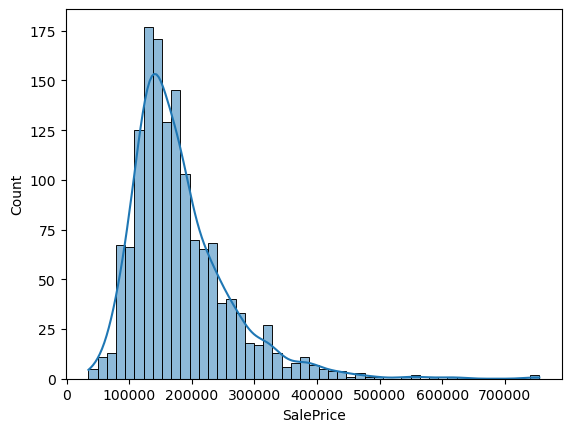

In [73]:
import seaborn as sns
sns.histplot(df1['SalePrice'], kde = True)

In [74]:
# Replacing null values with the median
for column in df1.columns:
     if df1[column].dtype == 'object':  # Categorical columns
            df1[column].fillna(df1[column].mode()[0], inplace=True)
     else:  # Numerical columns
           df1[column].fillna(df1[column].median(), inplace=True)
 

In [75]:
df1.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

# Checking the correlation for Numerical data

In [76]:
# identifyoing the best columns as correlated with saleprice column

X_train_num = df1.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df1[X_train_num].corr()
saleprice_correlation = correlation_matrix['SalePrice'].sort_values(ascending=False)
print("Top Numerical Features by Correlation:\n", saleprice_correlation.head(15))

Top Numerical Features by Correlation:
 SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.472614
Fireplaces      0.466929
GarageYrBlt     0.466754
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64


# Checking the correlation for categorical data

In [77]:
from scipy.stats import f_oneway

# Choose a categorical column (e.g., Neighborhood)
X_train_categ = df1.select_dtypes(exclude=['float64', 'int64']).columns

# Iterate over each categorical column and perform ANOVA
for category_column in X_train_categ:
# Group SalePrice by the categories of Neighborhood
    grouped_data = [group['SalePrice'].values for _, group in df1.groupby(category_column)]

# Perform one-way ANOVA
    f_statistic, p_value = f_oneway(*grouped_data)

    print(f"ANOVA Test for {category_column} and SalePrice")
    print(f"F-statistic: {f_statistic}")
    print(f"P-value: {p_value}")
    print("="*50)


ANOVA Test for MSZoning and SalePrice
F-statistic: 43.84028167245718
P-value: 8.817633866272648e-35
ANOVA Test for Street and SalePrice
F-statistic: 2.4592895583691994
P-value: 0.11704860406782483
ANOVA Test for LotShape and SalePrice
F-statistic: 40.132851662262944
P-value: 6.447523852011766e-25
ANOVA Test for LandContour and SalePrice
F-statistic: 12.850188333283924
P-value: 2.7422167521379096e-08
ANOVA Test for Utilities and SalePrice
F-statistic: 0.29880407484898486
P-value: 0.5847167739689381
ANOVA Test for LotConfig and SalePrice
F-statistic: 7.80995412346779
P-value: 3.163167473604189e-06
ANOVA Test for LandSlope and SalePrice
F-statistic: 1.9588170374149438
P-value: 0.1413963584114019
ANOVA Test for Neighborhood and SalePrice
F-statistic: 71.78486512058278
P-value: 1.5586002827707996e-225
ANOVA Test for Condition1 and SalePrice
F-statistic: 6.118017137125926
P-value: 8.904549416138853e-08
ANOVA Test for Condition2 and SalePrice
F-statistic: 2.0738986215227877
P-value: 0.0434256

In [78]:
X_train_categ

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

# One hot encoding
Changing categorical data into numbers

In [79]:
# Import libraries
import pandas as pd

# Ensure X_train_categ is treated as a list of column names
categorical_columns = list(X_train_categ)  # Convert to list if necessary

# One-hot encode all categorical columns
one_hot_encoded_data = pd.get_dummies(df1[categorical_columns], prefix=categorical_columns)

# Combine with the original dataset, dropping the original categorical columns
train_encoded = pd.concat([df1.drop(columns=categorical_columns), one_hot_encoded_data], axis=1)

# Ensure the output is a DataFrame
train_encoded = pd.DataFrame(train_encoded)

# Display the first few rows of the updated DataFrame
print(train_encoded.head())


   Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLw  SaleType_New  \
0          2003       196.0         706  ...           False         False   
1          1976         0.0         978  ...           False         False   
2          2002       162.0         486  ...           False         False   
3          1970         0.0         216  ...           False         False   
4          2000       350.0         655  ...           False         False   

   SaleType_Oth  SaleType_WD  SaleCondition_Abnorm

# Spliting into dependent and independent parameters

In [80]:
y_train = df1["SalePrice"]
X_train =   train_encoded

# Checking the importance of the numerical columns

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target for regression
features = ['OverallQual', 'GrLivArea', 'GarageCars','GarageArea', 'TotalBsmtSF']
X = X_train[features]
y = y_train

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('coeff',model.coef_, 'intercept',model.intercept_, 'MSE',mse, 'R2',r2)

coeff [2.38356716e+04 4.24297678e+01 1.59140142e+04 1.56063185e+01
 2.75004748e+01] intercept -94263.36142498106 MSE 1598354833.0864496 R2 0.7916184018889856


# Feature engineering

In [82]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Train a RandomForest model for feature importance
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Extract feature importance
feature_importances = random_forest.feature_importances_

# Combine feature names with their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

feature_importance_df


,Feature,Importance
0,OverallQual,0.586915
1,GrLivArea,0.208590
4,TotalBsmtSF,0.116505
3,GarageArea,0.060801
2,GarageCars,0.027189


# Testing for overfitting and underfitting

In [83]:
import matplotlib.pyplot as plt


### Simple Linear Regression model ###
Training MSE: 1491922047.9872394
Testing MSE: 1598354833.0864496
Training R^2 Score: 0.7498684807748
Testing R^2 Score: 0.7916184018889856


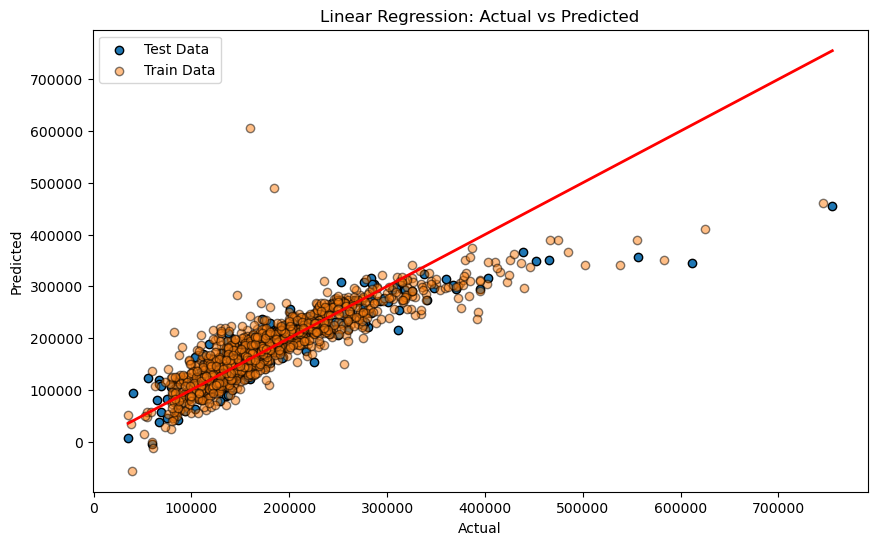

In [84]:
# Testing for overfit or underfit using linear regression
def linear_regression_intro(X_train, X_test, y_train, y_test):
    print("\n### Simple Linear Regression model ###")
    
    # Initialize and train the model
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = lr.predict(X_train)
    y_test_pred = lr.predict(X_test)
    
    # Evaluation
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    print(f"Training MSE: {train_mse}")
    print(f"Testing MSE: {test_mse}")
    print(f"Training R^2 Score: {train_r2}")
    print(f"Testing R^2 Score: {test_r2}")
    
    # Visualization
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_test_pred, edgecolors=(0, 0, 0), label='Test Data')
    plt.scatter(y_train, y_train_pred, edgecolors=(0, 0, 0), label='Train Data', alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Linear Regression: Actual vs Predicted')
    plt.legend()
    plt.show()

linear_regression_intro(X_train, X_test, y_train, y_test)


# Multiple regression model

In [85]:
import statsmodels.api as sm

In [86]:
model = sm.OLS(y_train, sm.add_constant(X_train))
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     696.7
Date:                Wed, 11 Dec 2024   Prob (F-statistic):               0.00
Time:                        21:06:27   Log-Likelihood:                -13993.
No. Observations:                1168   AIC:                         2.800e+04
Df Residuals:                    1162   BIC:                         2.803e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.426e+04   5233.535    -18.011      